In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_csv('all_seasons.csv')
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [4]:
df = df.drop(columns=['Unnamed: 0', 'college', 'country', 'draft_year', 'draft_round', 'draft_number', 'team_abbreviation', 'age'])
df['season'] = (df['season'].str[:2] + df['season'].str[-2:]).fillna(0).astype(int)
df.head()

,player_name,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,193.04,94.800728,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1997
1,Gaylon Nickerson,190.50,86.182480,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1997
2,George Lynch,203.20,103.418976,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1997
3,George McCloud,203.20,102.058200,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1997
4,George Zidek,213.36,119.748288,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1997


In [5]:
players = df[df['season'] == 2023]['player_name'] # list of players in 2023
df = df[df['player_name'].isin(players)] # filters out non-2023 players
df_2022 = df[df['season'] == 2022].drop(columns=['season']) # keeps the 2022 season of those players in another df
df_2023 = df[df['season'] == 2023][['player_name', 'gp', 'pts', 'reb', 'ast']] # creates a 2023 season df
df = pd.merge(df_2022, df_2023, on='player_name', suffixes=('', '_pred'))
df.head()

,player_name,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,gp_pred,pts_pred,reb_pred,ast_pred
0,Usman Garuba,203.20,103.872568,24,2.0,3.5,0.7,7.0,0.083,0.263,0.091,0.510,0.084,75,3.0,4.1,0.9
1,Vlatko Cancar,203.20,107.047712,15,4.1,2.1,1.1,0.8,0.041,0.133,0.131,0.657,0.139,60,5.0,2.1,1.3
2,Vit Krejci,203.20,88.450440,30,6.2,3.4,1.9,-12.8,0.024,0.121,0.125,0.529,0.117,29,1.2,0.9,0.6
3,Victor Oladipo,193.04,96.615096,8,12.4,2.9,3.5,-1.4,0.017,0.110,0.247,0.608,0.277,42,10.7,3.0,3.5
4,Vernon Carey Jr.,205.74,122.469840,7,2.9,1.7,0.0,-47.6,0.145,0.093,0.179,0.534,0.000,11,0.5,1.0,0.3


In [6]:
df.dropna(inplace=True)
df.shape

(427, 17)

In [7]:
scaler_2022 = StandardScaler()
scaler_pred = StandardScaler()
df[['player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast', 'net_rating']] = scaler_2022.fit_transform(df[['player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast', 'net_rating']])
df[['gp_pred', 'pts_pred', 'reb_pred', 'ast_pred']] = scaler_pred.fit_transform(df[['gp_pred', 'pts_pred', 'reb_pred', 'ast_pred']])
df.head()

,player_name,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,gp_pred,pts_pred,reb_pred,ast_pred
0,Usman Garuba,0.491741,0.518790,-1.343514,-1.257151,-0.224410,-0.794509,0.792220,0.083,0.263,0.091,0.510,0.084,0.999643,-1.000535,0.129610,-0.696727
1,Vlatko Cancar,0.491741,0.812698,-1.765579,-0.928016,-0.807680,-0.587457,0.182834,0.041,0.133,0.131,0.657,0.139,0.333457,-0.714390,-0.715972,-0.494962
2,Vit Krejci,0.491741,-0.908767,-1.062137,-0.598881,-0.266072,-0.173352,-1.153883,0.024,0.121,0.125,0.529,0.117,-1.043328,-1.258065,-1.223321,-0.848050
3,Victor Oladipo,-0.739775,-0.153002,-2.093852,0.372851,-0.474383,0.654858,-0.033400,0.017,0.110,0.247,0.608,0.277,-0.465966,0.101122,-0.335460,0.614745
4,Vernon Carey Jr.,0.799620,2.240255,-2.140748,-1.116093,-0.974329,-1.156850,-4.574304,0.145,0.093,0.179,0.534,0.000,-1.842751,-1.358215,-1.181042,-0.999374


In [8]:
player_df = df[['player_name']]
df = df.drop(columns=['player_name'])

<Axes: >

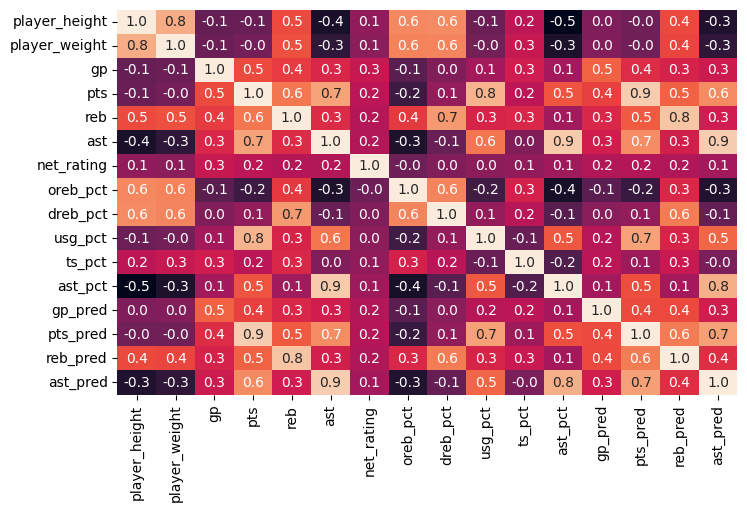

In [9]:
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(), cbar = False, annot = True, fmt=".1f")

In [10]:
df.head()

,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,gp_pred,pts_pred,reb_pred,ast_pred
0,0.491741,0.518790,-1.343514,-1.257151,-0.224410,-0.794509,0.792220,0.083,0.263,0.091,0.510,0.084,0.999643,-1.000535,0.129610,-0.696727
1,0.491741,0.812698,-1.765579,-0.928016,-0.807680,-0.587457,0.182834,0.041,0.133,0.131,0.657,0.139,0.333457,-0.714390,-0.715972,-0.494962
2,0.491741,-0.908767,-1.062137,-0.598881,-0.266072,-0.173352,-1.153883,0.024,0.121,0.125,0.529,0.117,-1.043328,-1.258065,-1.223321,-0.848050
3,-0.739775,-0.153002,-2.093852,0.372851,-0.474383,0.654858,-0.033400,0.017,0.110,0.247,0.608,0.277,-0.465966,0.101122,-0.335460,0.614745
4,0.799620,2.240255,-2.140748,-1.116093,-0.974329,-1.156850,-4.574304,0.145,0.093,0.179,0.534,0.000,-1.842751,-1.358215,-1.181042,-0.999374


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player_height  427 non-null    float64
 1   player_weight  427 non-null    float64
 2   gp             427 non-null    float64
 3   pts            427 non-null    float64
 4   reb            427 non-null    float64
 5   ast            427 non-null    float64
 6   net_rating     427 non-null    float64
 7   oreb_pct       427 non-null    float64
 8   dreb_pct       427 non-null    float64
 9   usg_pct        427 non-null    float64
 10  ts_pct         427 non-null    float64
 11  ast_pct        427 non-null    float64
 12  gp_pred        427 non-null    float64
 13  pts_pred       427 non-null    float64
 14  reb_pred       427 non-null    float64
 15  ast_pred       427 non-null    float64
dtypes: float64(16)
memory usage: 53.5 KB


In [12]:
X = df.iloc[:, :12]
y = df.iloc[:, -4:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)

(341, 12) (86, 12)
(341, 4) (86, 4)


In [13]:
def printPredictions(y_true,y_pred, count):
  print(f"Predictions: ")
  print(y_true.assign(
    Y1_pred = y_pred[:,0],
    Y2_pred = y_pred[:,1]
  ).head(count).to_markdown(index = False))

def showResults(y_true, y_pred, count = 5):
  print("R2 score: ",r2_score(y_true,y_pred))
  print("Mean squared error: ",mean_squared_error(y_true,y_pred))
  print("Mean absolute error: ",mean_absolute_error(y_true,y_pred))
  printPredictions(y_true,y_pred, count)

In [14]:
from sklearn.ensemble import ExtraTreesRegressor
extra_reg = ExtraTreesRegressor()
extra_reg.fit(X_train,y_train)
showResults(y_test,extra_reg.predict(X_test))

R2 score:  0.561493528122619
Mean squared error:  0.44690617201073757
Mean absolute error:  0.4840665158660741
Predictions: 
|   gp_pred |   pts_pred |   reb_pred |   ast_pred |   Y1_pred |   Y2_pred |
|----------:|-----------:|-----------:|-----------:|----------:|----------:|
| -0.688028 |  -1.22945  | -1.09648   |  -0.948933 | -0.302084 | -0.712959 |
|  0.777581 |  -0.628547 |  0.0873306 |  -0.545403 | -1.18189  | -0.91555  |
| -0.332729 |  -0.771619 | -1.09648   |  -0.898492 |  0.208214 | -0.408358 |
| -0.243904 |  -1.01484  | -1.05421   |  -0.545403 |  0.132269 | -0.537982 |
| -0.288317 |  -0.442553 | -0.420019  |   0.513863 |  0.18512  | -0.381604 |


In [15]:
df = pd.concat([player_df, df], axis=1)
df.head()

,player_name,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,gp_pred,pts_pred,reb_pred,ast_pred
0,Usman Garuba,0.491741,0.518790,-1.343514,-1.257151,-0.224410,-0.794509,0.792220,0.083,0.263,0.091,0.510,0.084,0.999643,-1.000535,0.129610,-0.696727
1,Vlatko Cancar,0.491741,0.812698,-1.765579,-0.928016,-0.807680,-0.587457,0.182834,0.041,0.133,0.131,0.657,0.139,0.333457,-0.714390,-0.715972,-0.494962
2,Vit Krejci,0.491741,-0.908767,-1.062137,-0.598881,-0.266072,-0.173352,-1.153883,0.024,0.121,0.125,0.529,0.117,-1.043328,-1.258065,-1.223321,-0.848050
3,Victor Oladipo,-0.739775,-0.153002,-2.093852,0.372851,-0.474383,0.654858,-0.033400,0.017,0.110,0.247,0.608,0.277,-0.465966,0.101122,-0.335460,0.614745
4,Vernon Carey Jr.,0.799620,2.240255,-2.140748,-1.116093,-0.974329,-1.156850,-4.574304,0.145,0.093,0.179,0.534,0.000,-1.842751,-1.358215,-1.181042,-0.999374


In [16]:
df_predict = pd.read_csv('all_seasons.csv')
df_predict = df_predict.drop(columns=['Unnamed: 0', 'college', 'country', 'draft_year', 'draft_round', 'draft_number', 'team_abbreviation', 'age'])
df_predict['season'] = (df_predict['season'].str[:2] + df_predict['season'].str[-2:]).fillna(0).astype(int)
df_predict = df_predict[df_predict['season'] == 2023]
df_predict.head()

,player_name,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
12305,Quentin Grimes,195.58,95.254320,71,11.3,3.2,2.1,4.4,0.022,0.085,0.142,0.619,0.096,2023
12306,Quenton Jackson,195.58,78.471416,9,6.2,0.9,1.7,-6.7,0.014,0.044,0.164,0.542,0.155,2023
12307,Pat Connaughton,195.58,94.800728,61,7.6,4.6,1.3,3.4,0.033,0.144,0.133,0.531,0.069,2023
12308,RJ Barrett,198.12,97.068688,73,19.6,5.0,2.8,-1.2,0.023,0.121,0.256,0.531,0.124,2023
12309,Precious Achiuwa,203.20,102.058200,55,9.2,6.0,0.9,-1.6,0.083,0.213,0.190,0.554,0.063,2023


In [17]:
scaler_2023 = StandardScaler()
df_predict[['player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast', 'net_rating']] = scaler_2023.fit_transform(df_predict[['player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast', 'net_rating']])
player_predict = df_predict['player_name']
df_predict.drop(columns=['player_name', 'season'], inplace=True)
df_predict.head()

,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
12305,-0.451586,-0.235477,0.932246,0.318711,-0.146379,0.016140,0.477981,0.022,0.085,0.142,0.619,0.096
12306,-0.451586,-1.770660,-1.585233,-0.427354,-1.127277,-0.190989,-0.412923,0.014,0.044,0.164,0.542,0.155
12307,-0.451586,-0.276969,0.526201,-0.222552,0.450689,-0.398119,0.397720,0.033,0.144,0.133,0.531,0.069
12308,-0.140327,-0.069512,1.013455,1.532895,0.621280,0.378616,0.028516,0.023,0.121,0.256,0.531,0.124
12309,0.482192,0.386894,0.282574,0.011508,1.047758,-0.605248,-0.003589,0.083,0.213,0.190,0.554,0.063


In [18]:
output = extra_reg.predict(df_predict)
output = scaler_pred.inverse_transform(output)
df_output = pd.DataFrame(output, columns=['gp_pred', 'pts_pred', 'reb_pred', 'ast_pred'])
df_output = pd.concat([player_predict.reset_index(drop=True), df_output], axis=1)
df_output.head(539)

,player_name,gp_pred,pts_pred,reb_pred,ast_pred
0,Quentin Grimes,65.06,11.434,3.274,2.149
1,Quenton Jackson,32.34,4.346,1.681,1.341
2,Pat Connaughton,51.96,7.166,3.570,1.327
3,RJ Barrett,68.68,19.555,4.861,2.992
4,Precious Achiuwa,50.26,8.401,4.812,0.880
...,...,...,...,...,...
534,Joel Embiid,63.25,30.060,10.176,4.864
535,John Butler Jr.,42.73,5.886,2.832,0.929
536,John Collins,62.64,14.015,5.966,1.717
537,Jericho Sims,34.81,4.493,3.613,0.613


In [19]:
df_combined = pd.read_csv('all_seasons.csv')
df_combined = df_combined.drop(columns=['Unnamed: 0', 'college', 'country', 'draft_year', 'draft_round', 'draft_number', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ast_pct'])
df_combined['season'] = (df_combined['season'].str[:2] + df_combined['season'].str[-2:]).fillna(0).astype(int)
df_combined = df_combined[df_combined['season'] == 2023]
df_combined.drop(columns=['season'], inplace=True)
df_combined.head()


,player_name,team_abbreviation,age,player_height,player_weight,gp,pts,reb,ast,net_rating,ts_pct
12305,Quentin Grimes,NYK,23.0,195.58,95.254320,71,11.3,3.2,2.1,4.4,0.619
12306,Quenton Jackson,WAS,24.0,195.58,78.471416,9,6.2,0.9,1.7,-6.7,0.542
12307,Pat Connaughton,MIL,30.0,195.58,94.800728,61,7.6,4.6,1.3,3.4,0.531
12308,RJ Barrett,NYK,23.0,198.12,97.068688,73,19.6,5.0,2.8,-1.2,0.531
12309,Precious Achiuwa,TOR,23.0,203.20,102.058200,55,9.2,6.0,0.9,-1.6,0.554


In [20]:
df_combined = pd.merge(df_combined.reset_index(drop=True), df_output, on='player_name')
df_combined.head()

,player_name,team_abbreviation,age,player_height,player_weight,gp,pts,reb,ast,net_rating,ts_pct,gp_pred,pts_pred,reb_pred,ast_pred
0,Quentin Grimes,NYK,23.0,195.58,95.254320,71,11.3,3.2,2.1,4.4,0.619,65.06,11.434,3.274,2.149
1,Quenton Jackson,WAS,24.0,195.58,78.471416,9,6.2,0.9,1.7,-6.7,0.542,32.34,4.346,1.681,1.341
2,Pat Connaughton,MIL,30.0,195.58,94.800728,61,7.6,4.6,1.3,3.4,0.531,51.96,7.166,3.570,1.327
3,RJ Barrett,NYK,23.0,198.12,97.068688,73,19.6,5.0,2.8,-1.2,0.531,68.68,19.555,4.861,2.992
4,Precious Achiuwa,TOR,23.0,203.20,102.058200,55,9.2,6.0,0.9,-1.6,0.554,50.26,8.401,4.812,0.880


In [22]:
df_combined.to_csv('player_database.csv', index=False)